In [25]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

#MAKE SURE ALL MASS VALUES ARE POSITIVE!!!

In [27]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [3]:
Kep_ID, sep, gkclr, prot = np.loadtxt ('Janes2017_data.txt', usecols=(1,6,9,10), unpack=True)

In [4]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

x=np.where((Lfl_Lbol < 1e-15))
Lfl_Lbol[x]=1e-15

Crossmatching data sets:

In [5]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')

for k in range (len(Kep_ID)):
    x = np.where((Kep_ID[k] == kicnum))
    m[k] = x[0]
#     Kep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# NewKep_ID == kicnum[m]


array([132671, 132672, 144448, 144449, 142808, 142810, 153617, 157477,
       132769, 132770, 108385, 108387, 132802, 132803,   7930,   7931,
       149992, 149993,  29406,  29410,  26066,  26068, 187373, 187374,
        11118,  11119,  13994,  13996, 183085, 184614, 183085, 183086,
       131248, 131249,  24915,  24916, 164346, 164348,  37239,  37240,
       192322, 192323,  79074,  79076,  27342,  27343,  87342,  87343,
        37297,  37303,  42220,  43035,  72384,  73829, 124659, 124660,
       194206, 194208, 162388, 162389, 139891, 139892, 200317, 200318,
       143354, 143355, 119436, 119438, 206144, 206146,  39412,  39413,
        11406,  11407,  50947,  50949,  14345,  14347,  35289,  35290,
       162505, 162508,  39509,  39510, 145172, 145174,  51373,  51375,
       150496, 150501,  29853,  29855,  42397,  42398,  84021,  84023,
       147054, 147055,  55863,  55864,  71283,  71285, 133586, 133590,
       156320, 156321,  59526,  59527, 138526, 138527,   8633,   8634,
      

In [6]:
len(m)

186

Sorting primary & secondary components:

In [7]:
a = np.arange(0,186,2)
b = np.arange(1,186,2)

for j in range(0,len(a)):
    if giclr[m][a[j]] > giclr[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

In [32]:
Good_either = np.where(((Lfl_Lbol[m][a] > 1e-7) | (Lfl_Lbol[m][b] > 1e-7)) & 
                        ((Lfl_Lbol[m][a] > 1e-15) & (Lfl_Lbol[m][b] > 1e-15)) & 
                        ((sep[a] < 40000)))
print(np.size(Good_either))

18


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


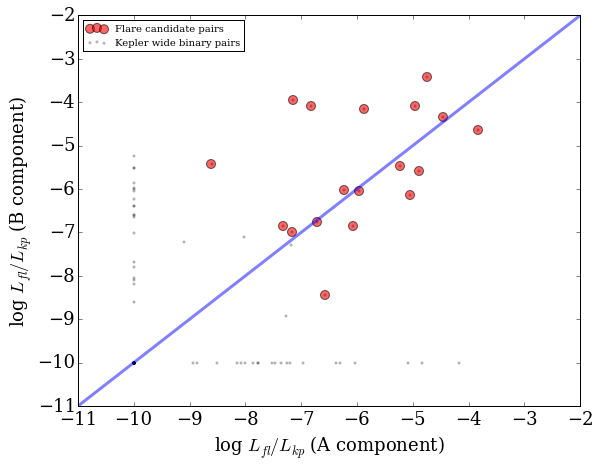

In [33]:
plt.figure(figsize=(9,7))

# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_a2]), np.log10(Lfl_Lbol[m][b][Good_both_a2]), 'ro', alpha = 0.6)
# plt.plot(np.log10(Lfl_Lbol[m][a][Good_both_b2]), np.log10(Lfl_Lbol[m][b][Good_both_b2]), 'bo', alpha = 0.6)
plt.scatter(np.log10(Lfl_Lbol[m][a][Good_either]), np.log10(Lfl_Lbol[m][b][Good_either]), alpha = 0.6, s=80, 
            c='r', label='Flare candidate pairs')

# plt.text(-4,-3,'N=')

plt.scatter(np.log10(Lfl_Lbol[m][a]+1e-10), np.log10(Lfl_Lbol[m][b]+1e-10), s=5, c='k', alpha=0.2, 
            label='Kepler wide binary pairs')
plt.legend(fontsize=10, loc=2)

plt.plot([-11,-2], [-11,-2], lw=3, alpha=0.5)

plt.xlim(-11, -2)
plt.ylim(-11, -2)
plt.xlabel(r'log $L_{fl}/L_{kp}$ (A component)')
plt.ylabel(r'log $L_{fl}/L_{kp}$ (B component)')

plt.savefig('AB_v3.png',dpi=500)

In [34]:
ginan = np.argwhere(np.isnan(giclr))

f = range(len(giclr))

f = [i for j, i in enumerate(f) if j not in ginan]
len(f)

203923

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


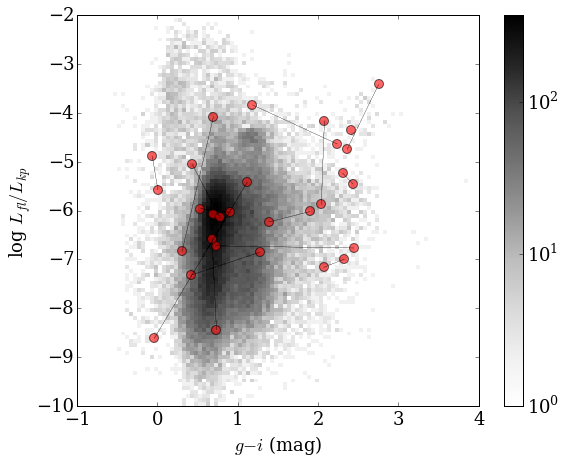

In [35]:
plt.figure(figsize=(9,7))
plt.scatter(giclr[m][a][Good_either],np.log10(Lfl_Lbol[m][a][Good_either]),alpha = 0.6,s=80,c='r')
plt.scatter(giclr[m][b][Good_either],np.log10(Lfl_Lbol[m][b][Good_either]),alpha = 0.6,s=80,c='r')
for k in range (len(Good_either[0])):
    plt.plot([giclr[m][a][Good_either],giclr[m][b][Good_either]],[np.log10(Lfl_Lbol[m][a][Good_either]),np.log10(Lfl_Lbol[m][b][Good_either])],'k',lw=0.2,alpha=0.1)

    
ok = np.where(np.isfinite(giclr))
plt.hist2d(giclr[ok],np.log10(Lfl_Lbol[ok]),bins=100, range=[[-1,4],[-10,-2]], cmap=cm.Greys,norm=LogNorm())
plt.colorbar()
    
plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.xlabel(r'$g-i$ (mag)')

plt.savefig('PairPlot_v3.png',dpi=500)
plt.show()

In [36]:
np.isnan(giclr[m]).any()

True

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


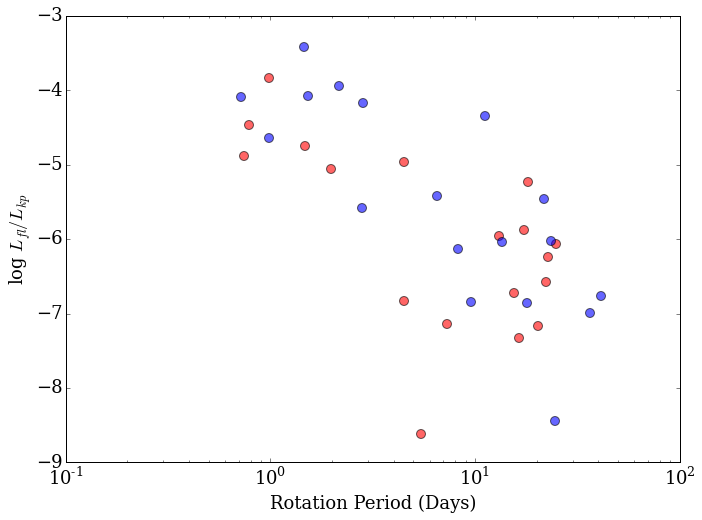

In [37]:
fig = plt.figure(figsize=(11,8))#connect these by lines

plt.scatter(prot[a][Good_either],np.log10(Lfl_Lbol[m][a][Good_either]),alpha = 0.6,s=80,c='r')
plt.scatter(prot[b][Good_either],np.log10(Lfl_Lbol[m][b][Good_either]),alpha = 0.6,s=80,c='b')

plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.xlabel(r'Rotation Period (Days)')
plt.xscale('log')


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


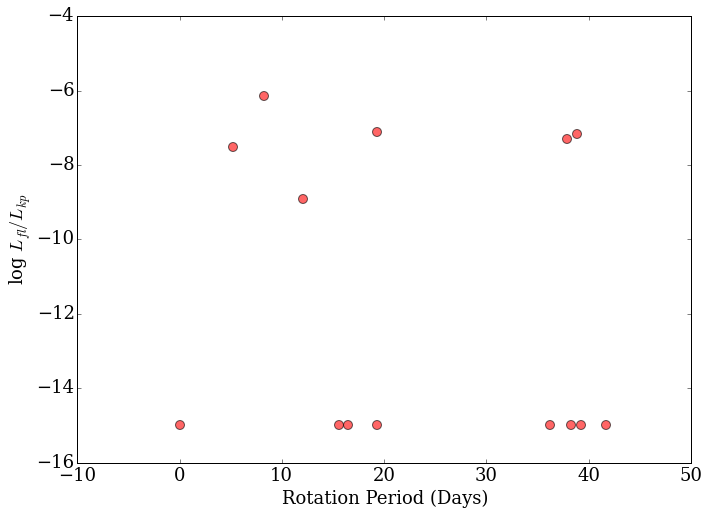

In [21]:
fig = plt.figure(figsize=(11,8))

plt.scatter(prot[Good_either],np.log10(Lfl_Lbol[m][Good_either]),alpha = 0.6,s=80,c='r')

plt.ylabel(r'log $L_{fl}/L_{kp}$')
plt.xlabel(r'Rotation Period (Days)')
